In [70]:
import iris
import matplotlib.pyplot as plt
import matplotlib.colors
import iris.quickplot as qplt
from matplotlib.colors import BoundaryNorm
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
cmap = matplotlib.colors.ListedColormap([(0.32,0.42,0.95),(0,0.79,0.20),(0.12,0.83,0.41),(0.37,0.88,0.45),(0.64,0.92,0.51),(0.87,0.97,0.57),
                                         (0.96,0.90,0.58),(0.78,0.70,0.46),(0.64,0.49,0.37),(0.56,0.38,0.33),(0.64,0.49,0.45),(0.70,0.59,0.55),
                                        (0.78,0.69,0.67),(0.86,0.80,0.79),(0.93,0.89,0.89),(1,1,1)])

In [168]:
def orog_plot(filename,model):
    cubes = iris.load_cube(filename)  
    lat = cubes.coord('latitude')
    lon = cubes.coord('longitude')
    cubes.coord('longitude').bounds = None

    plt.figure(figsize=(12, 10))
    levels=list(range(0,1600,100))
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

    plt.subplot(121)
    orog2 = cubes.intersection(longitude=(-7,7),latitude=(0,20))
    lat_subW = orog2.coord('latitude')
    lon_subW = orog2.coord('longitude')
    qplt.pcolormesh(orog2[:,:],cmap=cmap,norm=norm,edgecolor='gray')
    plt.gca().coastlines()
    plt.plot([-1.5], [6.5],color='black', marker='o')  # Bosumtwi
    plt.title(model,{'fontsize':24}) 
    for j in range(0,len(lat.points),2):
        if ((lat.points[j]>=0) & (lat.points[j]<=20)):
            plt.text(lon_subW.points[0], lat.points[j], j,horizontalalignment='center',verticalalignment='center',fontsize=12)
    for j in range(0,len(lon.points),2):
        if ((lon.points[j]>=-7) & (lon.points[j]<=7)):
            plt.text(lon.points[j],lat_subW.points[0],j,horizontalalignment='center',verticalalignment='center',fontsize=12)
        if ((lon.points[j]>=354)):
            plt.text(lon.points[j]-360,lat_subW.points[0],j,horizontalalignment='center',verticalalignment='center',fontsize=12)

    plt.subplot(122)
    orog = cubes.intersection(longitude=(25,42),latitude=(-15,15))
    lat_subE = orog.coord('latitude')
    lon_subE = orog.coord('longitude')    
    qplt.pcolormesh(orog[:,:],cmap=cmap,norm=norm,edgecolor='gray')
    plt.gca().coastlines()
    plt.gca().add_feature(cfeature.LAKES, edgecolor='black', facecolor='none')
    plt.plot([37.5333], [0.0833],color='black', marker='o')  # Sacred and Rutundu
    plt.plot([31], [1.75],color='black', marker='o')  # Albert
    plt.plot([36], [3.5],color='black', marker='o')  # Turkana
    plt.title(model,{'fontsize':24}) 
    for j in range(0,len(lat.points),2):
        if ((lat.points[j]>=-15) & (lat.points[j]<=15)):
            plt.text(lon_subE.points[0], lat.points[j], j,horizontalalignment='center',verticalalignment='center',fontsize=12)
    for j in range(0,len(lon.points),2):
        if ((lon.points[j]>=25) & (lon.points[j]<=42)):
            plt.text(lon.points[j],lat_subE.points[0],j,horizontalalignment='center',verticalalignment='center',fontsize=12)

    plt.show()
    elev_compare(cubes)

In [3]:
def elev_compare(orog_cube):
    print("Bosumtwi (150 m)=", orog_cube.data[orog_cube.coord('latitude').nearest_neighbour_index(6.5),orog_cube.coord('longitude').nearest_neighbour_index(-1.5)],"m at (",orog_cube.coord('latitude').nearest_neighbour_index(6.5),',', orog_cube.coord('longitude').nearest_neighbour_index(-1.5),")")
    print("Tana (1830 m)=", orog_cube.data[orog_cube.coord('latitude').nearest_neighbour_index(12),orog_cube.coord('longitude').nearest_neighbour_index(37)],"m at (",orog_cube.coord('latitude').nearest_neighbour_index(12),',', orog_cube.coord('longitude').nearest_neighbour_index(37),")")
    print("Turkana (360 m)=", orog_cube.data[orog_cube.coord('latitude').nearest_neighbour_index(3.5),orog_cube.coord('longitude').nearest_neighbour_index(36)],"m at (",orog_cube.coord('latitude').nearest_neighbour_index(3.5),',', orog_cube.coord('longitude').nearest_neighbour_index(36),")")
    print("Albert (615 m)=", orog_cube.data[orog_cube.coord('latitude').nearest_neighbour_index(1.75),orog_cube.coord('longitude').nearest_neighbour_index(31)],"m at (",orog_cube.coord('latitude').nearest_neighbour_index(1.75),',', orog_cube.coord('longitude').nearest_neighbour_index(31),")")
    print("Sacred/Rutundu (2350/3080 m)=", orog_cube.data[orog_cube.coord('latitude').nearest_neighbour_index(0),orog_cube.coord('longitude').nearest_neighbour_index(37.5)],"m at (",orog_cube.coord('latitude').nearest_neighbour_index(0),',', orog_cube.coord('longitude').nearest_neighbour_index(37.5),")")
    print("Victoria (1133 m)=", orog_cube.data[orog_cube.coord('latitude').nearest_neighbour_index(-1.23),orog_cube.coord('longitude').nearest_neighbour_index(33.2)],"m at (",orog_cube.coord('latitude').nearest_neighbour_index(-1.23),',', orog_cube.coord('longitude').nearest_neighbour_index(33.2),")")
    print("Tanganyika (773 m)=", orog_cube.data[orog_cube.coord('latitude').nearest_neighbour_index(-6.7),orog_cube.coord('longitude').nearest_neighbour_index(29.83)],"m at (",orog_cube.coord('latitude').nearest_neighbour_index(-6.7),',', orog_cube.coord('longitude').nearest_neighbour_index(29.83),")")
    print("Malawi (500 m)=", orog_cube.data[orog_cube.coord('latitude').nearest_neighbour_index(-10.265),orog_cube.coord('longitude').nearest_neighbour_index(34.317)],"m at (",orog_cube.coord('latitude').nearest_neighbour_index(-10.265),',', orog_cube.coord('longitude').nearest_neighbour_index(34.317),")")

C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\fileformats\cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'orog'
  warnings.warn(message % (variable_name, nc_var_name))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


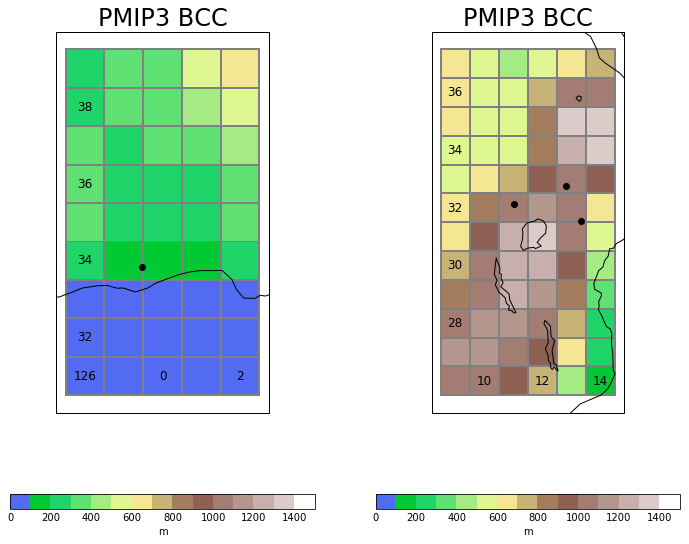

Bosumtwi (150 m)= 172.85725 m at ( 34 , 127 )
Tana (1830 m)= 1030.2434 m at ( 36 , 13 )
Turkana (360 m)= 1066.9637 m at ( 33 , 13 )
Albert (615 m)= 1051.8496 m at ( 32 , 11 )
Sacred/Rutundu (2350/3080 m)= 1041.4503 m at ( 31 , 13 )
Victoria (1133 m)= 1317.327 m at ( 31 , 12 )
Tanganyika (773 m)= 1214.3258 m at ( 29 , 11 )
Malawi (500 m)= 1052.5846 m at ( 28 , 12 )


In [169]:
orog_plot('orog_fx_bcc-csm1-1_historical_r0i0p0.nc','PMIP3 BCC')

C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\fileformats\cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'orog'
  warnings.warn(message % (variable_name, nc_var_name))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


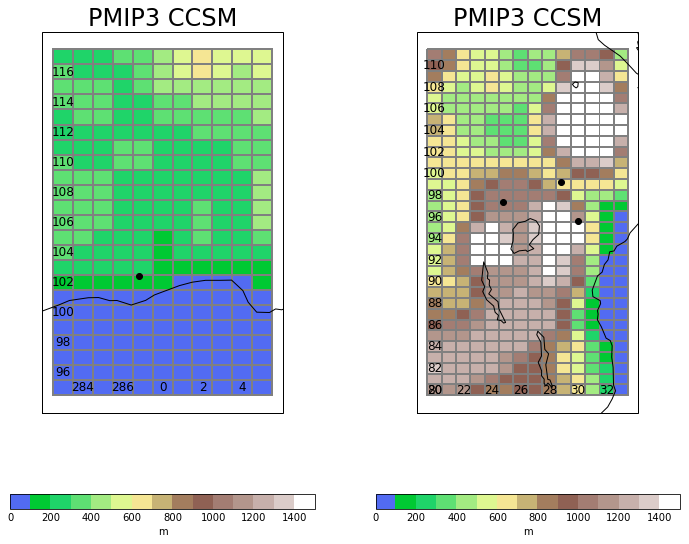

Bosumtwi (150 m)= 182.90993 m at ( 102 , 287 )
Tana (1830 m)= 1934.5686 m at ( 108 , 30 )
Turkana (360 m)= 662.9456 m at ( 99 , 29 )
Albert (615 m)= 1076.2745 m at ( 97 , 25 )
Sacred/Rutundu (2350/3080 m)= 1161.0896 m at ( 96 , 30 )
Victoria (1133 m)= 1348.541 m at ( 94 , 27 )
Tanganyika (773 m)= 1125.8015 m at ( 88 , 24 )
Malawi (500 m)= 1202.2657 m at ( 85 , 27 )
Sacred/Rutundu (2350/3080 m)= 1429.1404 m at ( 95, 30 )


C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\fileformats\cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'orog'
  warnings.warn(message % (variable_name, nc_var_name))


In [170]:
orog_plot('orog_fx_CCSM4_historical_r0i0p0.nc','PMIP3 CCSM')

cubes = iris.load_cube('orog_fx_CCSM4_historical_r0i0p0.nc')   # check out elevation of nearby cell
print("Sacred/Rutundu (2350/3080 m)=", cubes.data[95,30],"m at ( 95, 30 )")

C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\fileformats\cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'orog'
  warnings.warn(message % (variable_name, nc_var_name))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


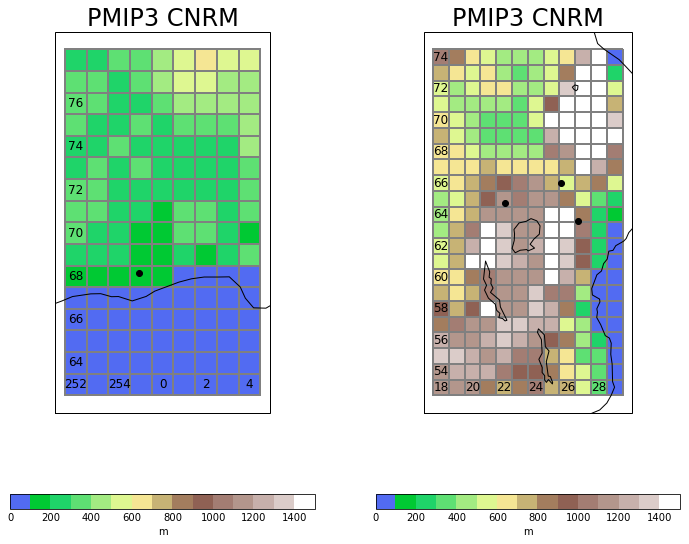

Bosumtwi (150 m)= 199.99173 m at ( 68 , 255 )
Tana (1830 m)= 1351.6661 m at ( 72 , 26 )
Turkana (360 m)= 519.7392 m at ( 66 , 26 )
Albert (615 m)= 1148.9955 m at ( 65 , 22 )
Sacred/Rutundu (2350/3080 m)= 1031.3804 m at ( 63 , 27 )
Victoria (1133 m)= 1167.8759 m at ( 63 , 24 )
Tanganyika (773 m)= 1001.6283 m at ( 59 , 21 )
Malawi (500 m)= 1127.7363 m at ( 56 , 24 )
Sacred/Rutundu (2350/3080 m)= 2064.248 m at ( 63, 26 )


C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\fileformats\cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'orog'
  warnings.warn(message % (variable_name, nc_var_name))


In [183]:
orog_plot('orog_fx_CNRM-CM5-2_historical_r0i0p0.nc','PMIP3 CNRM')

cubes = iris.load_cube('orog_fx_CNRM-CM5-2_historical_r0i0p0.nc')   # check out elevation of nearby cell
print("Sacred/Rutundu (2350/3080 m)=", cubes.data[63,26],"m at ( 63, 26 )")

C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\fileformats\cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'orog'
  warnings.warn(message % (variable_name, nc_var_name))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


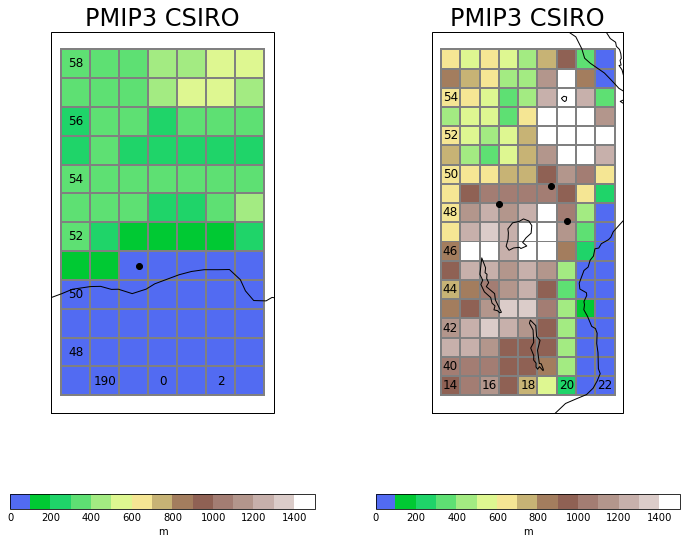

Bosumtwi (150 m)= 56.804623 m at ( 51 , 191 )
Tana (1830 m)= 1868.4338 m at ( 54 , 20 )
Turkana (360 m)= 1086.5385 m at ( 49 , 19 )
Albert (615 m)= 1154.9077 m at ( 48 , 17 )
Sacred/Rutundu (2350/3080 m)= 1131.9108 m at ( 47 , 20 )
Victoria (1133 m)= 1492.8693 m at ( 47 , 18 )
Tanganyika (773 m)= 1023.91846 m at ( 44 , 16 )
Malawi (500 m)= 1192.5107 m at ( 42 , 18 )
Sacred/Rutundu (2350/3080 m)= 1698.7539 m at ( 47, 19 )


C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\fileformats\cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'orog'
  warnings.warn(message % (variable_name, nc_var_name))


In [184]:
orog_plot('orog_fx_CSIRO-Mk3-6-0_historical_r0i0p0.nc','PMIP3 CSIRO')

cubes = iris.load_cube('orog_fx_CSIRO-Mk3-6-0_historical_r0i0p0.nc')   # check out elevation of nearby cell
print("Sacred/Rutundu (2350/3080 m)=", cubes.data[47,19],"m at ( 47, 19 )")

C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\fileformats\cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'orog'
  warnings.warn(message % (variable_name, nc_var_name))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


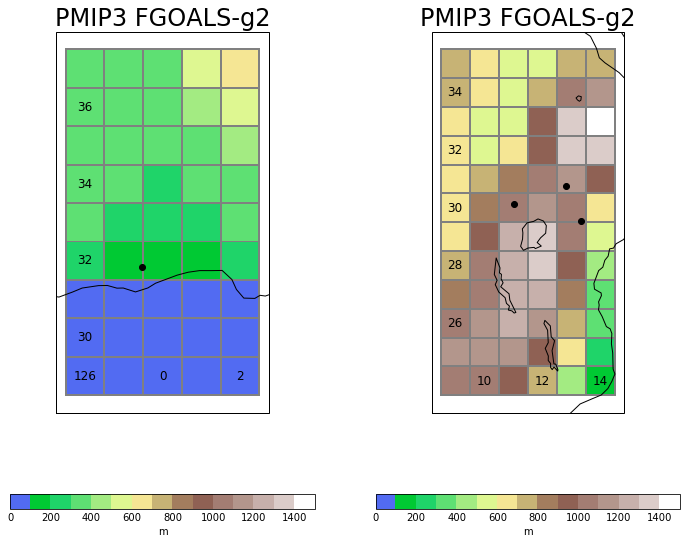

Bosumtwi (150 m)= 174.30775 m at ( 32 , 127 )
Tana (1830 m)= 1094.776 m at ( 34 , 13 )
Turkana (360 m)= 1138.3882 m at ( 31 , 13 )
Albert (615 m)= 1086.9868 m at ( 30 , 11 )
Sacred/Rutundu (2350/3080 m)= 1045.1483 m at ( 29 , 13 )
Victoria (1133 m)= 1328.3761 m at ( 29 , 12 )
Tanganyika (773 m)= 1239.7202 m at ( 27 , 11 )
Malawi (500 m)= 1100.4304 m at ( 26 , 12 )


In [173]:
orog_plot('orog_fx_FGOALS-g2_historical_r0i0p0.nc','PMIP3 FGOALS-g2')

C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\fileformats\cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'orog'
  warnings.warn(message % (variable_name, nc_var_name))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


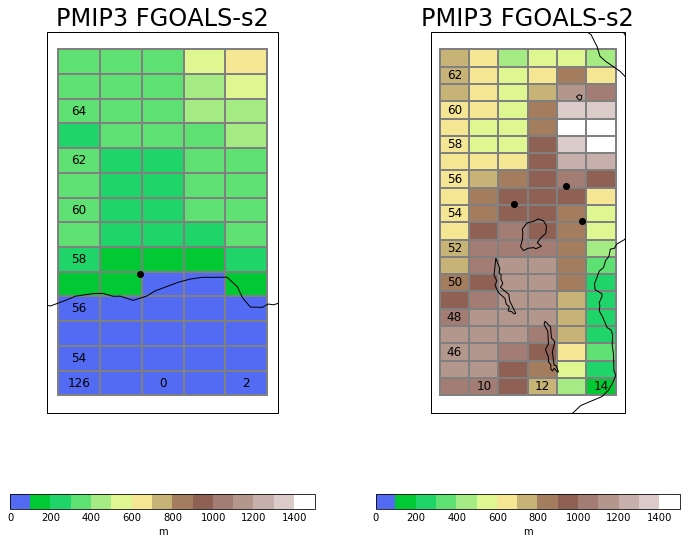

Bosumtwi (150 m)= 104.02887 m at ( 57 , 127 )
Tana (1830 m)= 1132.4832 m at ( 61 , 13 )
Turkana (360 m)= 1051.3314 m at ( 56 , 13 )
Albert (615 m)= 907.9185 m at ( 55 , 11 )
Sacred/Rutundu (2350/3080 m)= 849.46674 m at ( 53 , 13 )
Victoria (1133 m)= 944.92096 m at ( 53 , 12 )
Tanganyika (773 m)= 1195.0682 m at ( 49 , 11 )
Malawi (500 m)= 1041.7878 m at ( 47 , 12 )


In [174]:
orog_plot('orog_fx_FGOALS-s2_historical_r0i0p0.nc','PMIP3 FGOALS-s2')

C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\fileformats\cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'orog'
  warnings.warn(message % (variable_name, nc_var_name))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


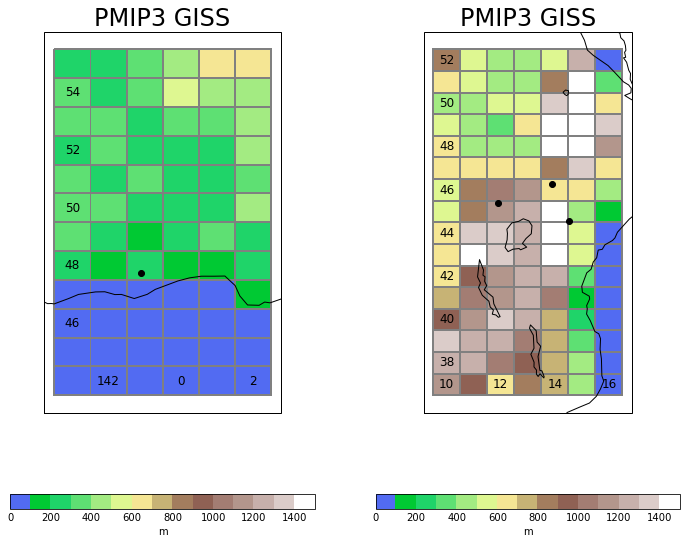

Bosumtwi (150 m)= 211.50085 m at ( 48 , 143 )
Tana (1830 m)= 1335.0275 m at ( 50 , 14 )
Turkana (360 m)= 611.7872 m at ( 46 , 14 )
Albert (615 m)= 1152.7399 m at ( 45 , 12 )
Sacred/Rutundu (2350/3080 m)= 1906.5796 m at ( 44 , 14 )
Victoria (1133 m)= 1245.5966 m at ( 44 , 13 )
Tanganyika (773 m)= 1052.8257 m at ( 41 , 11 )
Malawi (500 m)= 1040.7183 m at ( 39 , 13 )
Sacred/Rutundu (2350/3080 m)= 1504.4885 m at ( 45, 14 )


C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\fileformats\cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'orog'
  warnings.warn(message % (variable_name, nc_var_name))


In [185]:
orog_plot('orog_fx_GISS-E2-R_historical_r0i0p0.nc','PMIP3 GISS')

cubes = iris.load_cube('orog_fx_GISS-E2-R_historical_r0i0p0.nc')   # check out elevation of nearby cell
print("Sacred/Rutundu (2350/3080 m)=", cubes.data[45,14],"m at ( 45, 14 )")

C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\fileformats\cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'orog'
  warnings.warn(message % (variable_name, nc_var_name))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


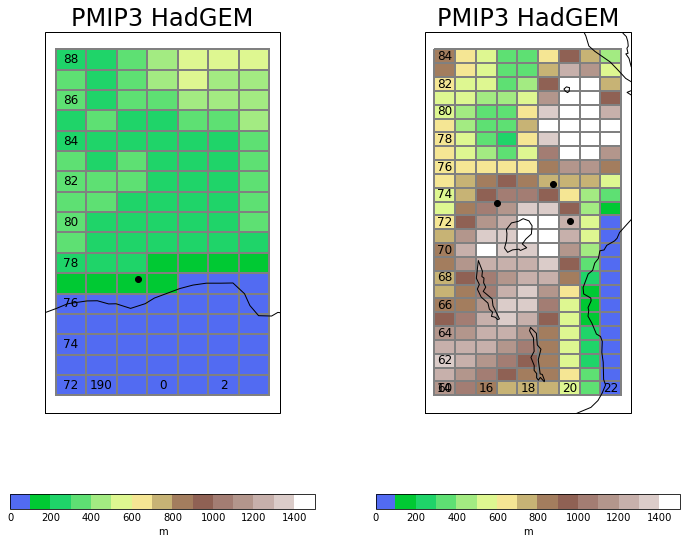

Bosumtwi (150 m)= 147.2919 m at ( 77 , 191 )
Tana (1830 m)= 1623.4672 m at ( 82 , 20 )
Turkana (360 m)= 721.7455 m at ( 75 , 19 )
Albert (615 m)= 1155.6711 m at ( 73 , 17 )
Sacred/Rutundu (2350/3080 m)= 1267.9381 m at ( 72 , 20 )
Victoria (1133 m)= 1438.7477 m at ( 71 , 18 )
Tanganyika (773 m)= 1010.50574 m at ( 67 , 16 )
Malawi (500 m)= 1155.9861 m at ( 64 , 18 )
Sacred/Rutundu (2350/3080 m)= 1617.5928 m at ( 72, 19 )


C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\fileformats\cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'orog'
  warnings.warn(message % (variable_name, nc_var_name))


In [186]:
orog_plot('orog_fx_HadGEM2-ES_historical_r0i0p0.nc','PMIP3 HadGEM')

cubes = iris.load_cube('orog_fx_HadGEM2-ES_historical_r0i0p0.nc')   # check out elevation of nearby cell
print("Sacred/Rutundu (2350/3080 m)=", cubes.data[72,19],"m at ( 72, 19 )")

C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\fileformats\cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'orog'
  warnings.warn(message % (variable_name, nc_var_name))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


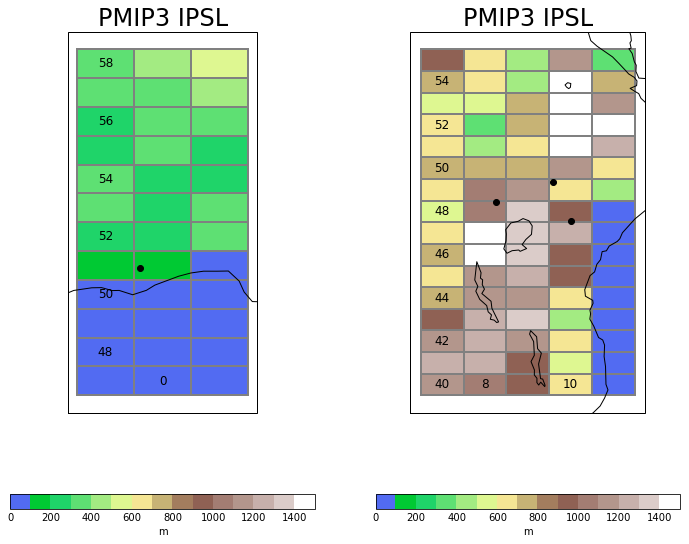

Bosumtwi (150 m)= 163.90298 m at ( 51 , 0 )
Tana (1830 m)= 1821.6138 m at ( 54 , 10 )
Turkana (360 m)= 683.5837 m at ( 49 , 10 )
Albert (615 m)= 1093.9872 m at ( 48 , 8 )
Sacred/Rutundu (2350/3080 m)= 1294.0416 m at ( 47 , 10 )
Victoria (1133 m)= 1337.1105 m at ( 47 , 9 )
Tanganyika (773 m)= 1133.1942 m at ( 44 , 8 )
Malawi (500 m)= 1184.7742 m at ( 42 , 9 )


In [177]:
orog_plot('orog_fx_IPSL-CM5A-LR_historical_r0i0p0.nc','PMIP3 IPSL')

C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\fileformats\cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'orog'
  warnings.warn(message % (variable_name, nc_var_name))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


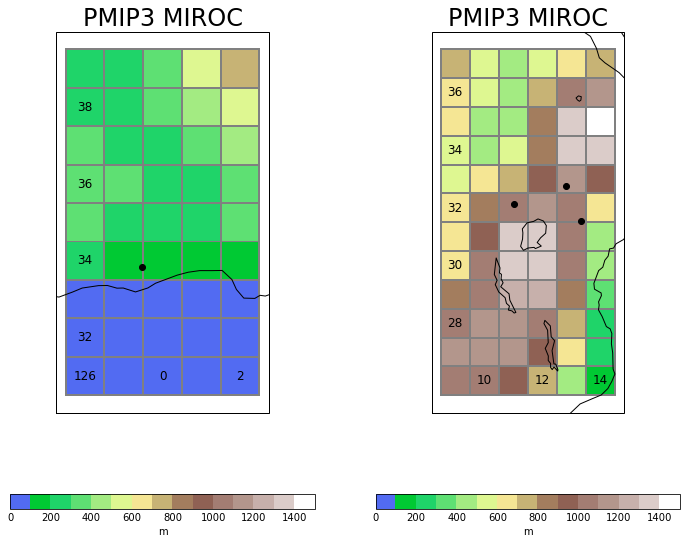

Bosumtwi (150 m)= 176.80995 m at ( 34 , 127 )
Tana (1830 m)= 1078.7416 m at ( 36 , 13 )
Turkana (360 m)= 1120.7244 m at ( 33 , 13 )
Albert (615 m)= 1072.8656 m at ( 32 , 11 )
Sacred/Rutundu (2350/3080 m)= 1059.7119 m at ( 31 , 13 )
Victoria (1133 m)= 1381.3208 m at ( 31 , 12 )
Tanganyika (773 m)= 1246.8369 m at ( 29 , 11 )
Malawi (500 m)= 1076.9763 m at ( 28 , 12 )


In [178]:
orog_plot('orog_fx_MIROC-ESM_historical_r0i0p0.nc','PMIP3 MIROC')

C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\fileformats\cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'orog'
  warnings.warn(message % (variable_name, nc_var_name))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


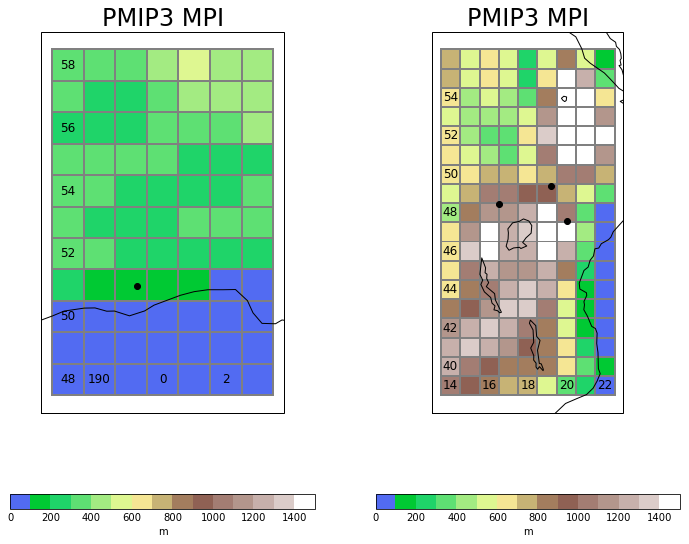

Bosumtwi (150 m)= 158.31274 m at ( 51 , 191 )
Tana (1830 m)= 1792.4377 m at ( 54 , 20 )
Turkana (360 m)= 904.06274 m at ( 49 , 19 )
Albert (615 m)= 1149.0627 m at ( 48 , 17 )
Sacred/Rutundu (2350/3080 m)= 1072.3127 m at ( 48 , 20 )
Victoria (1133 m)= 1345.1877 m at ( 47 , 18 )
Tanganyika (773 m)= 1033.4377 m at ( 44 , 16 )
Malawi (500 m)= 1099.4377 m at ( 42 , 18 )
Sacred/Rutundu (2350/3080 m)= 1427.5627 m at ( 47, 20 )


C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\fileformats\cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'orog'
  warnings.warn(message % (variable_name, nc_var_name))


In [187]:
orog_plot('orog_fx_MPI-ESM-P_historical_r0i0p0.nc','PMIP3 MPI')

cubes = iris.load_cube('orog_fx_MPI-ESM-P_historical_r0i0p0.nc')   # check out elevation of nearby cell
print("Sacred/Rutundu (2350/3080 m)=", cubes.data[47,20],"m at ( 47, 20 )")

C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\fileformats\cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'orog'
  warnings.warn(message % (variable_name, nc_var_name))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))


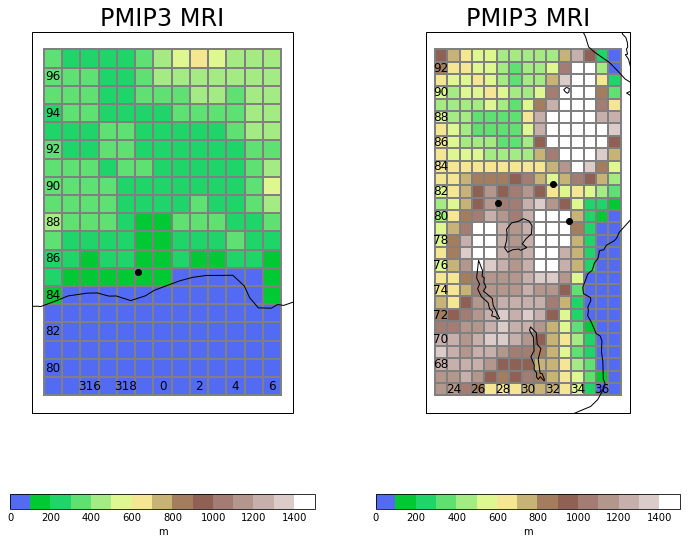

Bosumtwi (150 m)= 173.00845 m at ( 85 , 319 )
Tana (1830 m)= 1770.7883 m at ( 90 , 33 )
Turkana (360 m)= 507.1431 m at ( 83 , 32 )
Albert (615 m)= 1062.8569 m at ( 81 , 28 )
Sacred/Rutundu (2350/3080 m)= 1767.4736 m at ( 79 , 33 )
Victoria (1133 m)= 1245.8165 m at ( 78 , 30 )
Tanganyika (773 m)= 1117.619 m at ( 74 , 27 )
Malawi (500 m)= 914.93787 m at ( 70 , 31 )
Sacred/Rutundu (2350/3080 m)= 1545.1241 m at ( 80, 33 )


C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\fileformats\cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'orog'
  warnings.warn(message % (variable_name, nc_var_name))


In [189]:
orog_plot('orog_fx_MRI-CGCM3_historical_r0i0p0.nc','PMIP3 MRI')

cubes = iris.load_cube('orog_fx_MRI-CGCM3_historical_r0i0p0.nc')   # check out elevation of nearby cell
print("Sacred/Rutundu (2350/3080 m)=", cubes.data[80,33],"m at ( 80, 33 )")

C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\fileformats\cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'orog'
  warnings.warn(message % (variable_name, nc_var_name))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  'contiguous bounds.'.format(self.name()))
C:\Users\carrie.morrill\NOAA_SCRIPTS\envs\cmip\lib\site-packages\iris\coords.py:1140: UserWarning: Coordinate 'latitude' is 

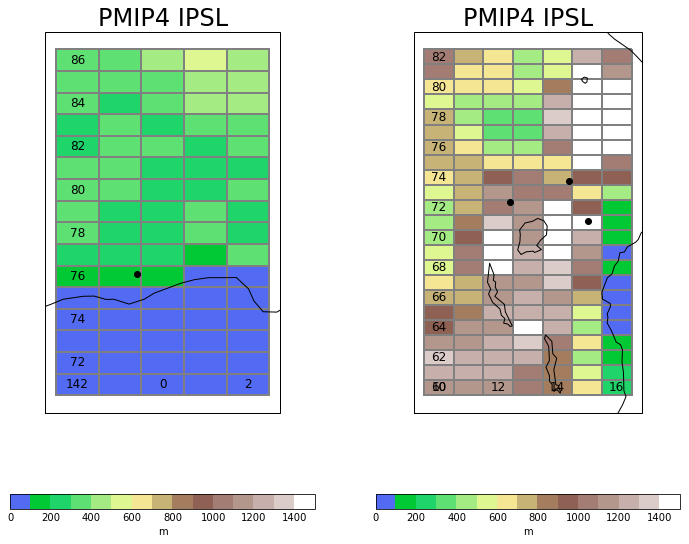

Bosumtwi (150 m)= 188.80296 m at ( 76 , 143 )
Tana (1830 m)= 2168.8054 m at ( 80 , 15 )
Turkana (360 m)= 799.5494 m at ( 74 , 14 )
Albert (615 m)= 1036.8221 m at ( 72 , 12 )
Sacred/Rutundu (2350/3080 m)= 1458.001 m at ( 71 , 15 )
Victoria (1133 m)= 1153.183 m at ( 70 , 13 )
Tanganyika (773 m)= 1130.8389 m at ( 66 , 12 )
Malawi (500 m)= 1018.51105 m at ( 63 , 14 )


In [181]:
orog_plot('orog_fx_IPSL-CM6A-LR_historical_r1i1p1f1_gr.nc','PMIP4 IPSL')